In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
df =df.iloc[:, 2:]

In [5]:
df.sample(5)

,Age,EstimatedSalary,Purchased
176,35,47000,0
74,32,18000,0
387,39,71000,0
8,25,33000,0
71,24,27000,0


## **Train Test Split**

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased',axis = 1), df['Purchased'],test_size=0.3,random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

## **Standard Scaler**

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler object to the training set. It will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
 

In [8]:
scaler.mean_   # It will give two mean values - one for age and one for Estimated Salary feature

array([3.78642857e+01, 6.98071429e+04])

In [9]:
# If you notice here the original X_train was a dataframe while the scaled data is numpy array i.e. standard scaler returns a numpy array.
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [20]:
# So we convert the numpy array (that has been returned by Standard Scaler) into a datafram

X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_test.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)
print("Scaled value of Age and Estimated Salary after converting it into DataFrame: \n", X_train_scaled)

Scaled value of Age and Estimated Salary after converting it into DataFrame: 
           Age  EstimatedSalary
0   -1.163172        -1.584970
1    2.170181         0.930987
2    0.013305         1.220177
3    0.209385         1.075582
4    0.405465        -0.486047
..        ...              ...
275  0.993704        -1.151185
276 -0.869053        -0.775237
277 -0.182774        -0.514966
278 -1.065133        -0.457127
279 -1.163172         1.393691

[280 rows x 2 columns]


In [22]:
# Here you can see mean = 0 and SD = 1

np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


## **Effect of Scaling**

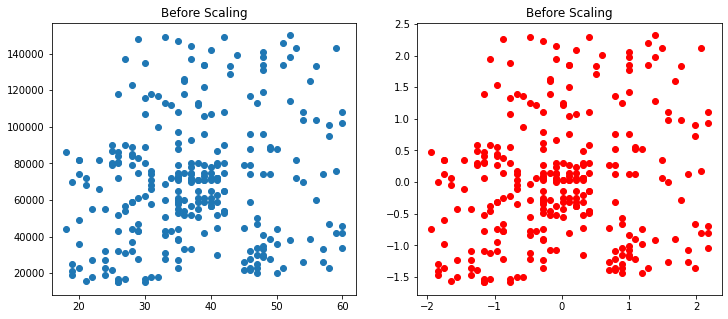

In [27]:
# Here you can see that Scaling did not change the shape of the distribution. It just changed the scale of X and Y axis

fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (12,5))
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color ='red')
ax2.set_title('Before Scaling')
plt.show()


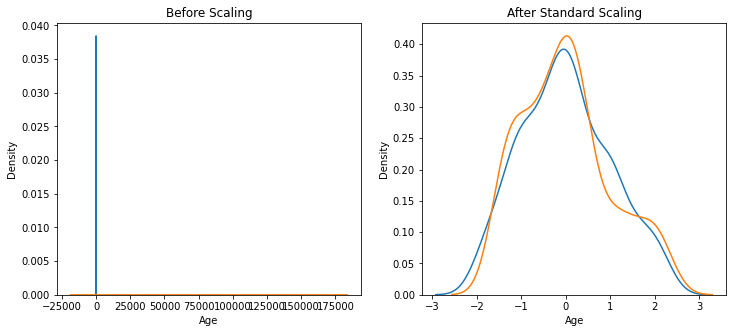

In [29]:
# Probability Density Function - Shows how the PDF changes with Scaling with Mean = 0 and SD = 1
# blue line represents age while yellow lines represent Estimated Salary

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()